In [ ]:
"""
Import necessary libraries
"""

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [ ]:
"""
Parameters
"""
#Stabdard deviation of the x distribution [x~N(μ,16)].
sigma_x = 4

#Parameters of the prior of the mean [μ~N(0,4)].
mean_zero = 0
sigma_theta = 2

#Parameters of the distribution N(7,16) to generate N observations for x.
mu, sigma = 7, 4

#How many points
Ns = [1, 5, 10, 20, 50, 100, 1000]

mean_list = []
var_list = []

rows = 2
columns = 4


fig, axs = plt.subplots(rows, columns, figsize=(19,10))

For N = 1: Mean = 2.02 | Variance = 3.2
For N = 5: Mean = 4.109 | Variance = 1.778
For N = 10: Mean = 5.811 | Variance = 1.143
For N = 20: Mean = 5.133 | Variance = 0.667
For N = 50: Mean = 6.13 | Variance = 0.296
For N = 100: Mean = 6.464 | Variance = 0.154
For N = 1000: Mean = 6.84 | Variance = 0.016


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:84: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


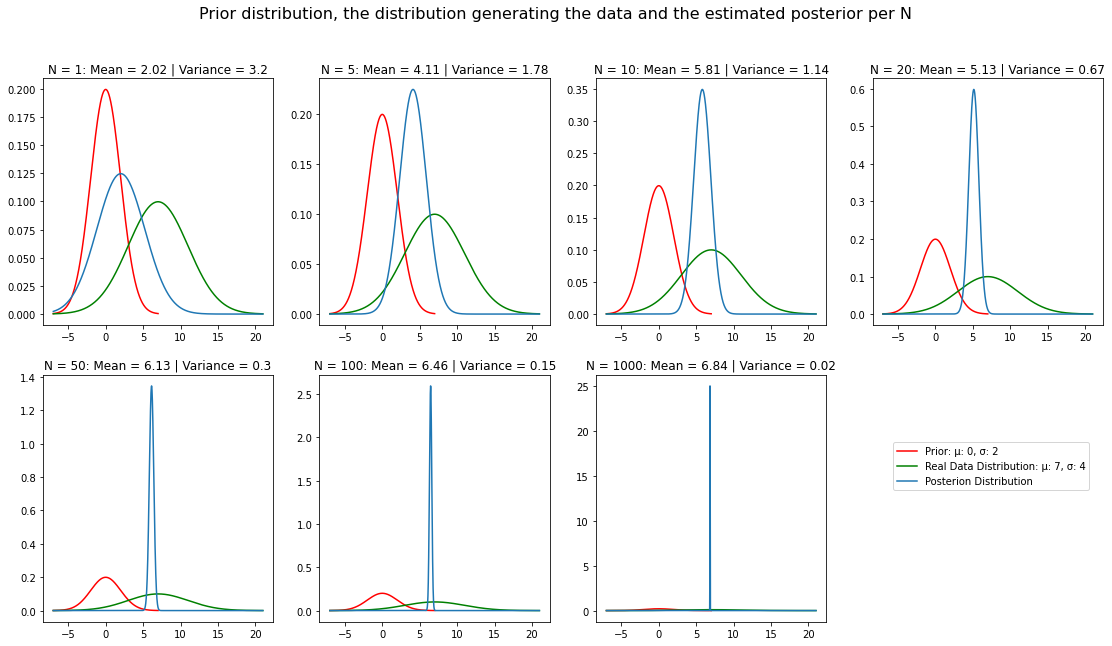

In [ ]:
for i, N in enumerate(Ns):        #Repeat for every value of N

    #Create N observations normally distributed around mu=7 with variance=16
    x = np.random.normal(mu, sigma, N)
    #Find the mean of the x's
    mu_x = np.mean(x)

    #Calculate numerator of the mean of the posterior
    mean_post_num = N*(sigma_theta**2)*mu_x + (sigma_x**2)*mean_zero
    #Calculate the denominator of the mean's and variance's formulas
    denominator = N*(sigma_theta**2) + (sigma_x**2)
    #Calculate the numerator of the variance of the posterior
    var_post_num = (sigma_x**2)*(sigma_theta**2)

    #Calculate the mean of the posterior
    mean_post = mean_post_num/denominator
    #Calculate the variance of the posterior
    var_post = var_post_num/denominator
    
    mean_list.append(mean_post)
    var_list.append(var_post)

    #Print the results
    print("For N = {}: Mean = {} | Variance = {}".format(str(N), str(round(mean_post, 3)), str(round(var_post, 3))))

    #Create the distribution of the prior
    x_prior = np.arange(-7, 7, 0.001)
    #plt.plot(x_prior, norm.pdf(x_prior, mean_zero, sigma_theta), label="Prior: μ: 0, σ: 2", color='red')

    #Create the distribution generating the data
    x_distr = np.arange(-7, 21, 0.001)
    #plt.plot(x_distr, norm.pdf(x_distr, mu, sigma), label="Real Data Distribution: μ: 7, σ: 4", color='green')

    #Create the estimated posterior distribution
    x_post = np.arange(-7, 21, 0.001)
    #plt.plot(x_post, norm.pdf(x_post, mean_post, var_post), label="Posterion Distribution: μ: {}, σ: {}".format(str(round(mean_post, 2)), str(round(var_post, 2))))

    if i > (rows*columns/2)-1:
        j = 1
        i -= 4
    else:
        j = 0


    #Create image
    label = "N = {}: Mean = {} | Variance = {}".format(str(N), str(round(mean_post, 2)), str(round(var_post, 2)))
    l1 = axs[j,i].plot(x_prior, norm.pdf(x_prior, mean_zero, sigma_theta), color='red')
    l2 = axs[j,i].plot(x_distr, norm.pdf(x_distr, mu, sigma), color='green')
    l3 = axs[j,i].plot(x_post, norm.pdf(x_post, mean_post, var_post))
    axs[j,i].set_title(label)


line_labels = ["Prior: μ: 0, σ: 2", "Real Data Distribution: μ: 7, σ: 4", "Posterion Distribution"]

fig.suptitle('Prior distribution, the distribution generating the data and the estimated posterior per N', fontsize=16)
fig.delaxes(axs[1,3])
fig.legend(
    [l1, l2, l3],
    labels=line_labels,
    loc='right', bbox_to_anchor=(0.5, 0., 0.3, 0.5),
)
plt.show()

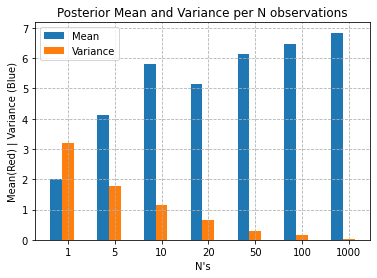

In [ ]:
#Create bar plot for the validation loss per activation function and per number of layers
x_axis=np.arange(len(Ns))
#Width of the bars
width = 0.25
#Apply grid line
plt.grid(linestyle='--')

#For Mean
bar1 = plt.bar(x_axis, mean_list, width)

#For Variance
bar2 = plt.bar(x_axis+width, var_list, width)


plt.xlabel("N's")
plt.ylabel("Mean(Red) | Variance (Blue)")
plt.title("Posterior Mean and Variance per N observations")


plt.xticks(x_axis+width, Ns)
plt.legend( (bar1, bar2), ('Mean', 'Variance') )

plt.show()